In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
IMG_PATH = './noisy_circ_board.png'
img = cv2.cvtColor(cv2.imread(IMG_PATH), cv2.COLOR_BGR2GRAY)

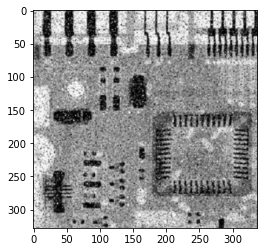

In [5]:
plt.imshow(img, cmap='gray')

In [6]:
from scipy.signal import convolve2d
from scipy.ndimage import median_filter

In [7]:
filtr = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0],
])

filtr_neg = -1*np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0],
])


filtr_strong = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1],
])

In [8]:
noise_reduced = median_filter(img, (7,7))

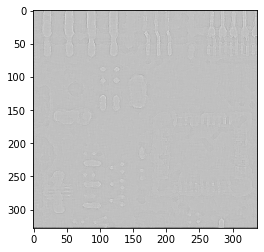

In [9]:
sharpened = convolve2d(noise_reduced, filtr, mode='same')

plt.imshow(sharpened, cmap='gray')

In [10]:
LENA_IMG = '../lena.png'
lena_img = cv2.cvtColor(cv2.imread(LENA_IMG), cv2.COLOR_BGR2GRAY)

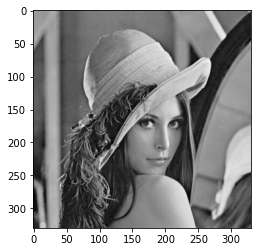

In [11]:
plt.imshow(lena_img, cmap='gray')

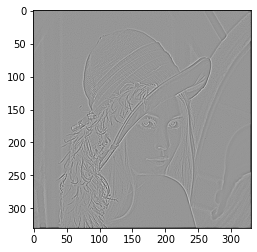

In [12]:
sharpened_lena = convolve2d(lena_img, filtr, mode='same')

plt.imshow(sharpened_lena, cmap='gray')

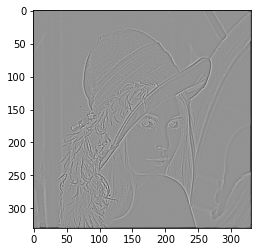

In [13]:
sharpened_lena_strong = convolve2d(lena_img, filtr_strong, mode='same')

plt.imshow(sharpened_lena_strong, cmap='gray')

In [14]:
sharpened_lena_strong[sharpened_lena_strong < 0] = 0

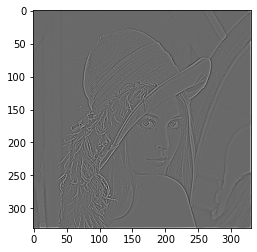

In [15]:
sharpened_lena_strong = convolve2d(lena_img, filtr_neg, mode='same')

plt.imshow(sharpened_lena_strong, cmap='gray')

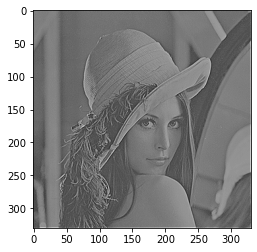

In [16]:
plt.imshow(lena_img + sharpened_lena_strong, cmap='gray')

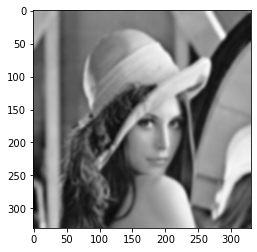

In [41]:
from scipy.ndimage import gaussian_filter

blured_lena = gaussian_filter(lena_img, 2)
plt.imshow(blured_lena, cmap='gray')

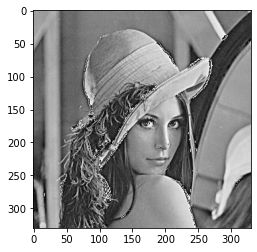

In [54]:
unsharp_mask_lena = lena_img - blured_lena

k = 1
plt.imshow(lena_img + k*unsharp_mask_lena, cmap='gray')

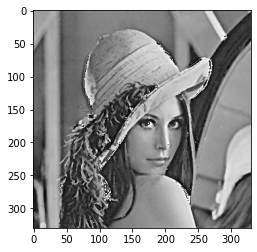

In [59]:
from scipy.ndimage import median_filter

plt.imshow(lena_img + median_filter(unsharp_masked_lena, 4), cmap='gray')

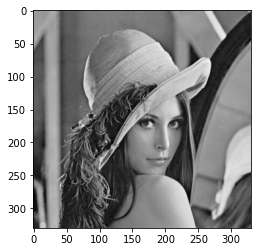

In [56]:
plt.imshow(lena_img, cmap='gray')

In [74]:
dip_xe_img = cv2.cvtColor(cv2.imread('./dip_xe.png'), cv2.COLOR_BGR2GRAY)


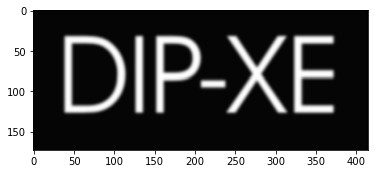

In [75]:
plt.imshow(dip_xe_img, cmap='gray')

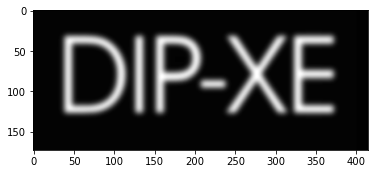

In [79]:
dxe_blured = gaussian_filter(dip_xe_img, 3)
plt.imshow(dxe_blured, cmap='gray')

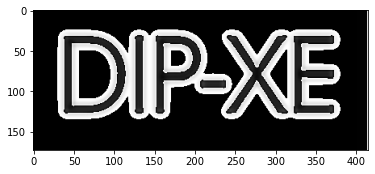

In [81]:
mask = dip_xe_img - dxe_blured

plt.imshow(mask, cmap='gray')

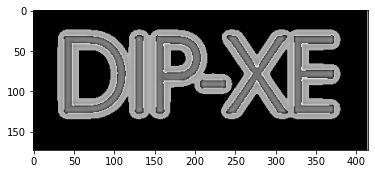

In [84]:
k = 1.2
dxe_res = dip_xe_img + k*mask

plt.imshow(dxe_res, cmap='gray')

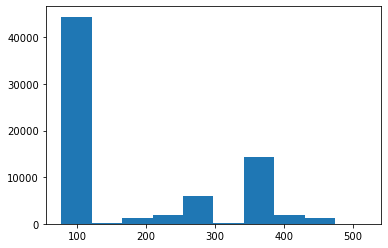

In [90]:
plt.hist(dxe_res.reshape(-1));

In [113]:
v_filtr = [
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
]

h_filtr = [
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
]

h_sobel_dxe = convolve2d(dip_xe_img, h_filtr)
v_sobel_dxe = convolve2d(dip_xe_img, v_filtr)

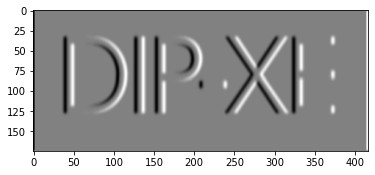

In [114]:
plt.imshow(h_sobel_dxe, cmap='gray')

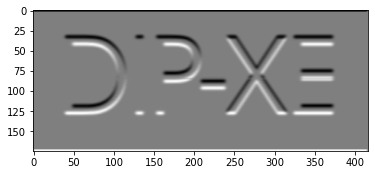

In [115]:
plt.imshow(v_sobel_dxe, cmap='gray')

In [244]:
lp_filter = 1/9*np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1],
])

impulse = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0],
])

hp_filter = impulse - lp_filter

In [243]:
(lp_filter*255).astype(int)

array([[28, 28, 28],
       [28, 28, 28],
       [28, 28, 28]])

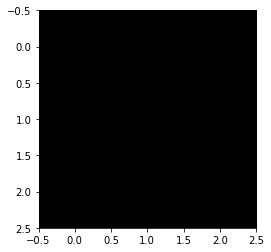

In [134]:
plt.imshow((lp_filter*255).astype(int), cmap='gray')

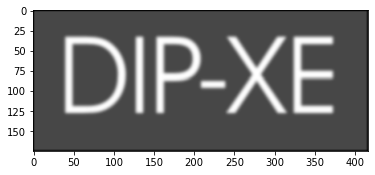

In [123]:
plt.imshow(convolve2d(dip_xe_img, lp_filter), cmap='gray')

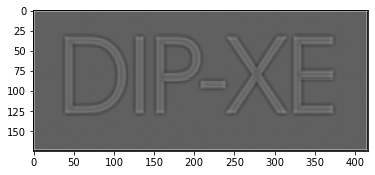

In [126]:
plt.imshow(convolve2d(dip_xe_img, hp_filter), cmap='gray')

In [218]:
x, y = np.meshgrid(np.arange(0, 100), np.arange(0, 100))

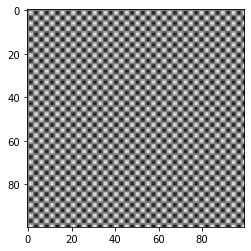

In [256]:
# x, y = np.meshgrid(np.arange(0, 100), np.arange(0, 100))
x = np.arange(0, 100)
f = np.sin(5*x)

sin_img = np.outer(f, f)
plt.imshow(sin_img, cmap='gray')

In [183]:
zp_img = cv2.cvtColor(cv2.imread('./zone_plate_img.png'), cv2.COLOR_BGR2GRAY)

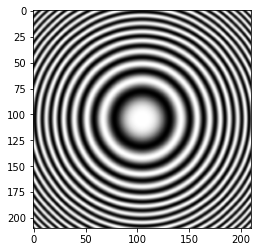

In [182]:
plt.imshow(zone_plate_img, cmap='gray')

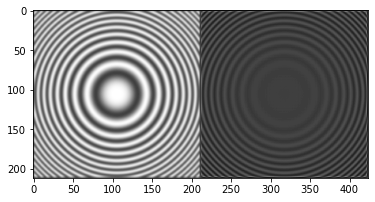

In [250]:
high_freq_zp = convolve2d(zp_img, lp_filter)
low_freq_zp = convolve2d(zp_img, hp_filter)

plt.imshow(np.hstack((high_freq_zp, low_freq_zp)), cmap='gray')

In [258]:
def generate_gaussian_filter(d, std=1):
    ax = np.linspace(-(d - 1) / 2., (d - 1) / 2., d)
    gauss = np.exp(-0.5 * np.square(ax) / std**2)
    kernel = np.outer(gauss, gauss)
    
    return kernel / np.sum(kernel)

In [267]:
def generate_hp_filter_from_lp_filter(lp_filter):
    filter_size = lp_filter.shape[0]
    
    impulse = np.zeros((FILTER_SIZE, FILTER_SIZE))
    impulse[filter_size//2][filter_size//2] = 1
    
    return impulse - lp_filter

In [273]:
plt.gray()

<Figure size 432x288 with 0 Axes>

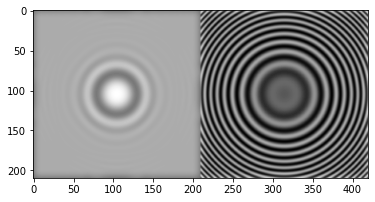

In [272]:
FILTER_SIZE = 21

lp_g_filter = generate_gaussian_filter(FILTER_SIZE, 5)
hp_filter = generate_hp_filter_from_lp_filter(lp_g_filter)

high_freq_zp = convolve2d(zp_img, lp_g_filter, mode='same')
low_freq_zp = convolve2d(zp_img, hp_filter, mode='same')

plt.imshow(np.hstack((high_freq_zp, low_freq_zp)), cmap='gray')

44100

In [282]:
recons_zp = high_freq_zp + low_freq_zp

In [283]:
np.sum(recons_zp == zp_img) / np.multiply(*zp_img.shape)

0.2002721088435374

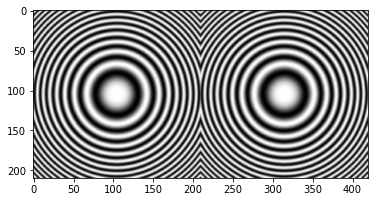

In [285]:
plt.imshow(np.hstack((zp_img, recons_zp)))